Environment: MacBook Pro: 16GB RAM, 500GB ROM

Every Image has 1024 * 1024 pixels = 1 048 576 pixels
Each pixel grey scale from 0 to 255 -> 1 Byte
Per image: 1.048576 MB -> 1 MB
About 110.000 images -> 110GB storage needed
Files stored as PNG, so only about 440KB per image, when working in Python and loading the Bitmap 1MB again

Unlike many other \ac{DL} research projects that can use up to \todo{zahlen und quelle}, this work has to deal with significant computational limitations. We are working on a MacBook Pro with a M1 CPU, 16GB of RAM and 500GB of ROM.

\section{Storage}
When downloading

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

image_sizes = np.linspace(64, 1024, 100)  # From 256px to 2048px (width and height)
num_images = np.linspace(10000, 100000, 100)     # From 1 to 100 images
X, Y = np.meshgrid(image_sizes, num_images)

# Calculate total storage needed in MB
# Storage = width * height * bytes_per_pixel * num_images
storage_needed = (X * X) * Y / 1e9  # Convert from bytes to GB

# Create 3D plot
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, storage_needed, cmap=cm.bwr, linewidth=0, rstride=1, cstride=1, shade=True, alpha=1)
surf.set_facecolor((1, 1, 1, 1))  # Set the alpha to 1 (fully opaque)


# Labels and title
ax.set_xlabel('Image Size (Pixels)', fontsize=11)
ax.set_ylabel('Number of Images', fontsize=11)
ax.set_zlabel('Memory Needed (GB)', fontsize=11)
ax.grid(False)
ax.tick_params(axis='x', labelsize=9)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=9)  # Y-axis tick labels
ax.tick_params(axis='z', labelsize=9)  # Z-axis tick labels

ax.set_facecolor('white')

# Adjust layout to avoid clipping
plt.tight_layout(pad=0)  # Remove padding
plt.subplots_adjust(left=-0.1, right=0.95, top=1, bottom=0.15)  # Adjust plot borders


plt.savefig('memory3dplot.pdf', format='pdf', dpi=300, pad_inches=0)  # Adjust dpi for higher resolution (e.g., 300)


# Show the plot
plt.show()



In [ ]:
from pympler import asizeof

image_sizes = np.linspace(64, 1024, 100)  # From 256px to 2048px (width and height)
num_images = np.linspace(10000, 100000, 100)     # From 1 to 100 images
X, Y = np.meshgrid(image_sizes, num_images)

# Initialize storage_needed array to store memory required for each combination of X and Y
storage_needed = np.zeros_like(X)

# Calculate memory needed for each (X, Y) combination
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        # For each image size X[i, j], calculate the memory needed
        single_image = np.random.rand(int(X[i, j]), int(X[i, j])).astype(np.float32)
        single_image = single_image.reshape(-1, int(X[i, j]), int(X[i, j]))
        storage_array = asizeof.asizeof(single_image)  # Memory for one image in bytes
        storage_needed[i, j] = storage_array * Y[i, j] / 1e9 # Convert from bytes to GB

# Create 3D plot
fig = plt.figure(figsize=(4,3.5))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, storage_needed, cmap=cm.bwr, linewidth=0, rstride=1, cstride=1, shade=True, alpha=1)
surf.set_facecolor((1, 1, 1, 1))  # Set the alpha to 1 (fully opaque)


# Labels and title
ax.set_xlabel('Image Size (Pixels)', fontsize=11)
ax.set_ylabel('Number of Images', fontsize=11)
ax.set_zlabel('Memory Needed (GB)', fontsize=11)
ax.grid(False)
ax.tick_params(axis='x', labelsize=9)  # X-axis tick labels
ax.tick_params(axis='y', labelsize=9)  # Y-axis tick labels
ax.tick_params(axis='z', labelsize=9)  # Z-axis tick labels

ax.set_facecolor('white')


# Adjust layout to avoid clipping
plt.tight_layout(pad=0)  # Remove padding
plt.subplots_adjust(left=-0.1, right=0.95, top=1, bottom=0.15)  # Adjust plot borders

plt.savefig('memory3dplot_2.pdf', format='pdf', dpi=300, pad_inches=0)  # Adjust dpi for higher resolution (e.g., 300)

# Show the plot
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

x_values = [50, 100, 150, 200, 250, 300, 350, 400]
y_values = {"test": [50.0, 51.0, 53.0, 55.0, 56.0, 57.0, 56.0, 53.0],
            "test2": [55.0, 51.0, 53.0, 55.0, 56.0, 59.0, 56.0, 53.0],
            "test3": [57.0, 51.0, 55.0, 55.0, 56.0, 57.0, 56.0, 53.0],
            "test4": [53.0, 51.0, 53.0, 55.0, 52.0, 57.0, 51.0, 53.0]}

for label, y_value in y_values.items():
    plt.plot(x_values, y_value, label=label)

plt.ylabel("Area under curve (AUC)")
plt.xlabel("Resolution in pixel x pixel")
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.show()

In [ ]:
labels = ['Atelectasis', 'Effusion', 'Infiltration', 'No Finding']
values = [6259, 7281, 13869, 60361]  # Replace these with the actual values you want

# labels = ['No Finding', 'Infiltration', 'Effusion', 'Atelectasis']
# value = [60361, 13869, 7281, 6259]

def func(pct, allvalues):
    absolute = int(pct/100.*sum(allvalues))
    return f"{absolute}\n({pct:.1f}%)"

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct=lambda pct: func(pct, values), startangle=90, 
       textprops={'fontsize': 10, 'color': 'white', 'alpha': 1}, labeldistance=1.1, pctdistance=0.8, counterclock=False)

for text in texts:
    text.set_fontsize(14)
    text.set_color('black')

ax.axis('equal')  # Ensures the pie chart is a circle

plt.savefig('dataset_pie.pdf', format='pdf', dpi=300, bbox_inches='tight')  # Adjust dpi for higher resolution (e.g., 300)

plt.show()

In [1]:
import cv2
image = cv2.imread('../DL_for_HIN_Chest_X_Ray/HIN_archive/images/00000009_000.png', cv2.IMREAD_GRAYSCALE)
cv2.imwrite("xray_32.png", cv2.resize(image, (32, 32)))
cv2.imwrite("xray_256.png", cv2.resize(image, (256, 256)))
cv2.imwrite("xray_384.png", cv2.resize(image, (384, 384)))

# quantized_image = (image // 2) * 2  # Divide by 2, then multiply by 2 to get multiples of 2 within [0, 127]
# 
# # Save the quantized image with 128 levels
# cv2.imwrite("xray_128_levels.png", quantized_image)
# 
# # Save the normalized images
# cv2.imwrite("xray_255.png", image)
# cv2.imwrite("xray_127.png", quantized_image)

True

[([0.5402481358676193,
   0.6404963069238536,
   0.6226374582910199,
   0.6205480213493924],
  0.24964106245513282,
  0.6955),
 ([0.569605734767025,
   0.673289008896273,
   0.5623993650504313,
   0.6144201092117758],
  0.25024654832347143,
  0.675),
 ([0.5886318734155084,
   0.654409107062043,
   0.6151737163874943,
   0.6497067161820663],
  0.2498173849525201,
  0.684),
 ([0.6224824430900162,
   0.6452470523552915,
   0.5788271164349552,
   0.6279773276130799],
  0.24982381959126146,
  0.709),
 ([0.6146583483679255,
   0.665014809751652,
   0.5930066590126291,
   0.634677407090692],
  0.2498189717595945,
  0.69)]

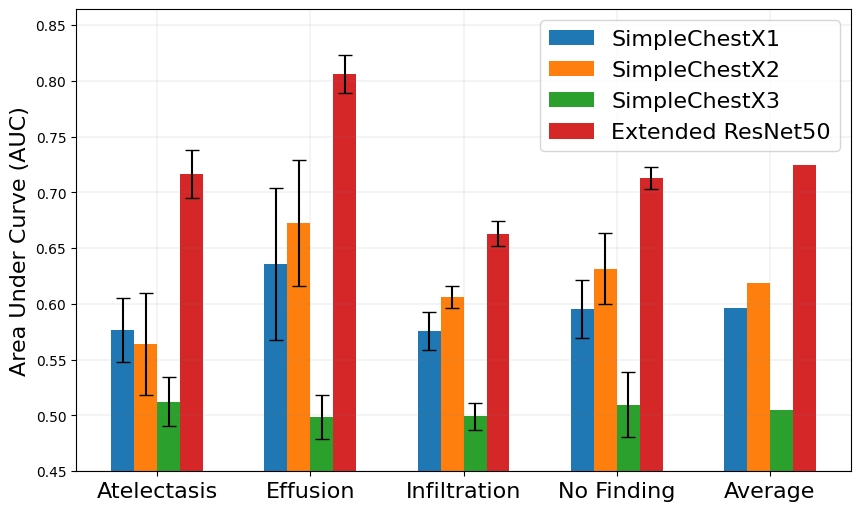

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# with open('pickles/chestxray8/resolution_10000samples_5runs_20epochs.pkl', 'rb') as file:
#     resnet50 = pickle.load(file)
# with open('models/resnet_2/evaluations.pkl', 'rb') as file:
#     resnet50_fromepoch = pickle.load(file)
    
resnet50 = {}
resnet50[224] = [([0.6198310291858679, 0.6551711990982104, 0.5960707233065443, 0.6414924663849448], 0.25100850893723947, 0.6715), ([0.6120786751209744, 0.6635597826086956, 0.5942466807082115, 0.6328284900284901], 0.25074850299401197, 0.6755), ([0.5994554535916419, 0.7131189599102591, 0.6132638684216202, 0.6579426356535396], 0.2507824511912532, 0.681), ([0.6491791577444683, 0.6603919850937205, 0.6151980392156864, 0.6546800023125398], 0.250604343720491, 0.704), ([0.6094432568082536, 0.646853146853147, 0.6123890884529183, 0.6289750706935477], 0.24964106245513282, 0.6955)]
# resnet50[224] = resnet50_fromepoch[50]


resnet50[224] = [([0.6789651401634378, 0.8269477796532798, 0.6567201730991798, 0.7208171397335754], 0.30988190364827384, 0.696), ([0.713548763869963, 0.7864835363479614, 0.6557470588235293, 0.7103146499392958], 0.3466270132134155, 0.693), ([0.7458871642345942, 0.8209220357107683, 0.651611095760032, 0.7154530004695163], 0.30930219278209226, 0.6995), ([0.7191359447004608, 0.8090542558327658, 0.6827682585976425, 0.7215059140593398], 0.28094845113033967, 0.6925), ([0.7231333859811765, 0.785866280938605, 0.6682598928228769, 0.695001711299635], 0.3163471269197541, 0.6895)]


resnet50_at, resnet50_ef, resnet50_in, resnet50_nf = [], [], [], []
for eval in resnet50[224]:
    resnet50_at.append(eval[0][0])
    resnet50_ef.append(eval[0][1])
    resnet50_in.append(eval[0][2])
    resnet50_nf.append(eval[0][3])
resnet50_means = {param: np.mean(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [resnet50_at, resnet50_ef, resnet50_in, resnet50_nf])}
resnet50_stds = {param: np.std(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [resnet50_at, resnet50_ef, resnet50_in, resnet50_nf])}

with open('pickles/resOnly224/resonly224_model1.pkl', 'rb') as file:
    model1 = pickle.load(file)
model1_at, model1_ef, model1_in, model1_nf = [], [], [], []
for eval in model1:
    model1_at.append(eval[0][0])
    model1_ef.append(eval[0][1])
    model1_in.append(eval[0][2])
    model1_nf.append(eval[0][3])
model1_means = {param: np.mean(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [model1_at, model1_ef, model1_in, model1_nf])}
model1_stds = {param: np.std(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [model1_at, model1_ef, model1_in, model1_nf])}

with open('pickles/resOnly224/resonly224_model2.pkl', 'rb') as file:
    model2 = pickle.load(file)
model2_at, model2_ef, model2_in, model2_nf = [], [], [], []
for eval in model2:
    model2_at.append(eval[0][0])
    model2_ef.append(eval[0][1])
    model2_in.append(eval[0][2])
    model2_nf.append(eval[0][3])
model2_means = {param: np.mean(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [model2_at, model2_ef, model2_in, model2_nf])}
model2_stds = {param: np.std(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [model2_at, model2_ef, model2_in, model2_nf])}

with open('pickles/resOnly224/resonly224_model3.pkl', 'rb') as file:
    model3 = pickle.load(file)
model3_at, model3_ef, model3_in, model3_nf = [], [], [], []
for eval in model3:
    model3_at.append(eval[0][0])
    model3_ef.append(eval[0][1])
    model3_in.append(eval[0][2])
    model3_nf.append(eval[0][3])
model3_means = {param: np.mean(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [model3_at, model3_ef, model3_in, model3_nf])}
model3_stds = {param: np.std(values) for param, values in zip(['at', 'ef', 'in', 'nf'], [model3_at, model3_ef, model3_in, model3_nf])}

model3_means= {'at': 0.5123, 'ef': 0.4987, 'in': 0.49934, 'nf': 0.50976}
model3_stds = {'at': 0.02197, 'ef': 0.01987, 'in': 0.0123, 'nf': 0.02912}

performance = np.array([[model1_means['at'], model1_means['ef'], model1_means['in'], model1_means['nf']],
                        [model2_means['at'], model2_means['ef'], model2_means['in'], model2_means['nf']],
                        [model3_means['at'], model3_means['ef'], model3_means['in'], model3_means['nf']],
                        [resnet50_means['at'], resnet50_means['ef'], resnet50_means['in'], resnet50_means['nf']]])
row_averages = np.mean(performance, axis=1)
performance = np.column_stack((performance, row_averages))

std_dev = np.array([[model1_stds['at'], model1_stds['ef'], model1_stds['in'], model1_stds['nf'], np.NaN],
                    [model2_stds['at'], model2_stds['ef'], model2_stds['in'], model2_stds['nf'], np.NaN],
                    [model3_stds['at'], model3_stds['ef'], model3_stds['in'], model3_stds['nf'], np.NaN],
                    [resnet50_stds['at'], resnet50_stds['ef'], resnet50_stds['in'], resnet50_stds['nf'], np.NaN]])


labels = ['Atelectasis', 'Effusion', 'Infiltration', 'No Finding', 'Average']
model_names = ['SimpleChestX1', 'SimpleChestX2', 'SimpleChestX3', 'Extended ResNet50']
n_models = len(model_names)
n_labels = len(labels)

font_size = 16

x = np.arange(n_labels)  # positions of the labels
width = 0.15  # width of each bar, smaller to fit all models in each label group

# Create a plot
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(n_models):
    ax.bar(x + i * width, performance[i], width, yerr=std_dev[i], label=model_names[i], capsize=5)

ax.set_xticks(x + width * (n_models - 1) / 2)  # Place the x-ticks in the middle of the grouped bars
ax.set_xticklabels(labels, fontsize=font_size)
ax.legend(fontsize=font_size, loc="upper right")
ax.set_ylim(0.45)
ax.set_ylabel("Area Under Curve (AUC)", fontsize=font_size)
# ax.set_xlabel("Labels", fontsize=font_size)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.savefig("evalsNewNew/architecture_10000samples_20epochs_earlystopping.pdf", bbox_inches='tight', pad_inches=0)

plt.show()

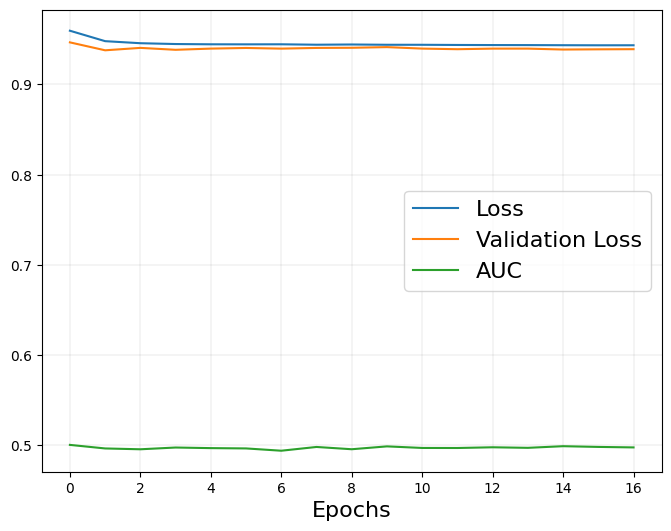

In [6]:
import matplotlib.pyplot as plt
import pickle

plt.figure(figsize=(8, 6))

with open(f"modelsAmount/resnet_4/history50000.pkl", "rb") as file:
    history = pickle.load(file)

font_size = 16

plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.plot(history.history['auc'], label="AUC")

plt.xlabel("Epochs", fontsize=font_size)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend(fontsize=font_size, loc="center right")

plt.show()


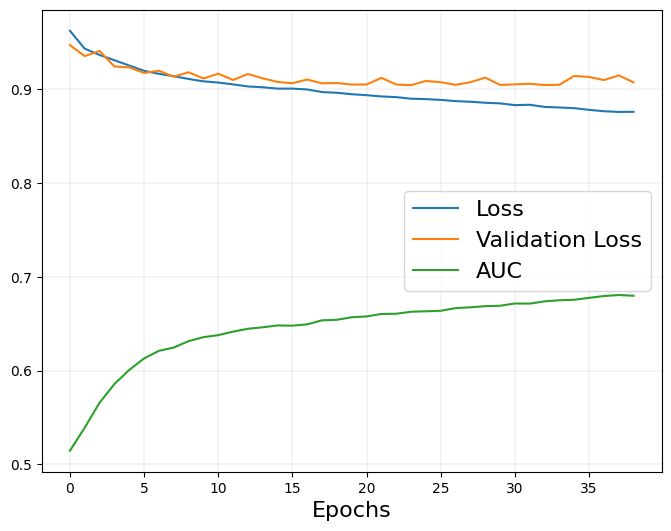

In [7]:
import matplotlib.pyplot as plt
import pickle

plt.figure(figsize=(8, 6))

with open(f"modelsAmount/resnet_4/history40000.pkl", "rb") as file:
    history = pickle.load(file)

font_size = 16

plt.plot(history.history['loss'], label="Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.plot(history.history['auc'], label="AUC")

plt.xlabel("Epochs", fontsize=font_size)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend(fontsize=font_size, loc="center right")

plt.show()


0.005841713998631322


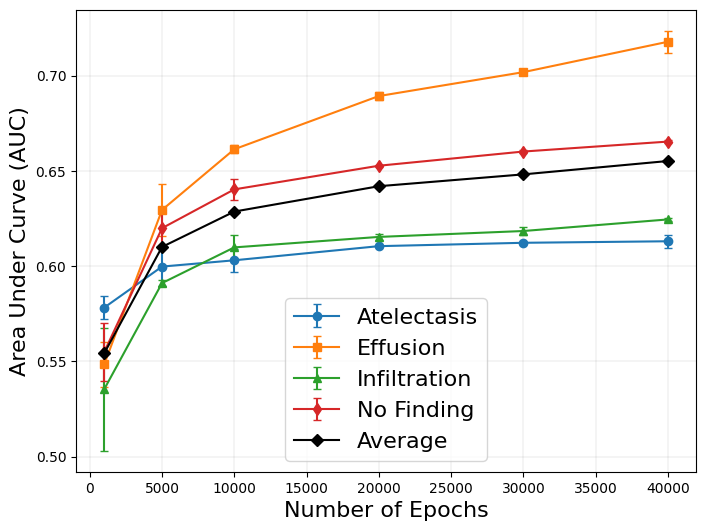

In [17]:
import matplotlib.pyplot as plt
import numpy as np

evaluations4 = {1000: ([0.5841490574218194, 0.5365978195779263, 0.5030567938793096, 0.5394470456713522], 0, 0), 5000: ([0.609868183787244, 0.6156259753266651, 0.589571216753318, 0.6098933366142533], 0, 0), 10000: ([0.6090849664002214, 0.6635231077819824, 0.6161661234664131, 0.6457216188456288], 0, 0), 20000: ([0.6109117641386872, 0.6871840742526674, 0.613840154627441, 0.6522705421909071], 0, 0), 30000: ([0.6116947607803203, 0.7025573175278497, 0.620497867076452, 0.6610828570452411], 0, 0), 40000: ([0.6097009621489003, 0.7119941288318201, 0.6252678315155984, 0.6647433114458209], 0, 0), 50000: ([0.5319275796202232, 0.4854422895418919, 0.5001905339464547, 0.5042448470428692], 0, 0)}

# resnet5, as well
evaluations5 = {1000: ([0.5722433619590344, 0.5601782437628127, 0.5676161280486687, 0.5702700616400442], 0, 0), 5000: ([0.589633439750994, 0.6433645919551633, 0.5925845345795391, 0.6299375163009063], 0, 0), 10000: ([0.597012619746545, 0.6591905965184912, 0.6034838782473867, 0.6348572768028906], 0, 0), 20000: ([0.6100367921465821, 0.6914004009778256, 0.6168105099967441, 0.6531414848733504], 0, 0), 30000: ([0.6127876855747237, 0.7011217799314934, 0.6163565320354832, 0.6592267611112853], 0, 0), 40000: ([0.616378551563905, 0.723599283326448, 0.6237336637805956, 0.6660194084585178], 0, 0)}

evaluations6 = {1000: ([0.5721266975811832, 0.5560206693659023, 0.5626609994096458, 0.5662762208691129], 0, 0), 5000: ([0.5909622222450608, 0.6424883864674352, 0.5918955752282395, 0.6298333476334197], 0, 0), 10000: ([0.6011053158605603, 0.6627050937092187, 0.6063134662960087, 0.6376975924511928], 0, 0)}


evaluations = {
    key: [
        evaluations4.get(key, (None, None, None)),
        evaluations5.get(key, (None, None, None))    ]
    for key in sorted(set(evaluations4) | set(evaluations5))
}
evaluations.pop(50000)

###############

plt.figure(figsize=(8, 6))

aucs_at_means = []
aucs_at_stds = []
aucs_ef_means = []
aucs_ef_stds = []
aucs_in_means = []
aucs_in_stds = []
aucs_nf_means = []
aucs_nf_stds = []
aucs_All_means = []
aucs_All_stds = []
baccs_means = []
baccs_stds = []
accs_means = []
accs_stds = []


for evals_per_epoch in evaluations.values():
    aucs_at = []
    aucs_ef = []
    aucs_in = []
    aucs_nf = []
    baccs = []
    accs = []
    
    for eval in evals_per_epoch:
        aucs_at.append(eval[0][0])
        aucs_ef.append(eval[0][1])
        aucs_in.append(eval[0][2])
        aucs_nf.append(eval[0][3])
        baccs.append(eval[1])
        accs.append(eval[2])

    aucs_at_means.append(np.mean(aucs_at))
    aucs_at_stds.append(np.std(aucs_at))
    aucs_ef_means.append(np.mean(aucs_ef))
    aucs_ef_stds.append(np.std(aucs_ef))
    aucs_in_means.append(np.mean(aucs_in))
    aucs_in_stds.append(np.std(aucs_in))
    aucs_nf_means.append(np.mean(aucs_nf))
    aucs_nf_stds.append(np.std(aucs_nf))
    aucs_All_means.append(np.mean(np.concatenate((aucs_at, aucs_ef, aucs_in, aucs_nf))))
    aucs_All_stds.append(np.std(np.concatenate((aucs_at, aucs_ef, aucs_in, aucs_nf))))
    baccs_means.append(np.mean(baccs))
    baccs_stds.append(np.std(baccs))
    accs_means.append(np.mean(accs))
    accs_stds.append(np.std(accs))
    
average_stds_per_epoch = []
for epoch_stds in zip(aucs_at_stds, aucs_ef_stds, aucs_in_stds, aucs_nf_stds):
    average_stds_per_epoch.append(np.mean(epoch_stds))

overall_average_std = np.mean(average_stds_per_epoch)
print(overall_average_std)


x_values = evaluations.keys()

font_size = 16

alpha = 1

plt.errorbar(x_values, aucs_at_means, yerr=aucs_at_stds, label='Atelectasis', fmt='-o', capsize=3, alpha=alpha)
plt.errorbar(x_values, aucs_ef_means, yerr=aucs_ef_stds, label='Effusion', fmt='-s', capsize=3, alpha=alpha)
plt.errorbar(x_values, aucs_in_means, yerr=aucs_in_stds, label='Infiltration', fmt='-^', capsize=3, alpha=alpha)
plt.errorbar(x_values, aucs_nf_means, yerr=aucs_nf_stds, label='No Finding', fmt='-d', capsize=3, alpha=alpha)
plt.errorbar(x_values, aucs_All_means, label='Average', marker='D', color='black')

# plt.plot(x_values, aucs_at_means, label='Atelectasis')
# plt.plot(x_values, aucs_ef_means, label='Effusion')
# plt.plot(x_values, aucs_in_means, label='Infiltration')
# plt.plot(x_values, aucs_nf_means, label='No Finding')
# plt.plot(x_values, aucs_All_means, color='black', label='Average')

plt.ylabel("Area Under Curve (AUC)", fontsize=font_size)
plt.xlabel("Number of Epochs", fontsize=font_size)
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend(fontsize=font_size, loc="lower center")

# plt.savefig("evalsNew/epochTest/noCallback_10000samples_5runs.pdf", bbox_inches='tight', pad_inches=0)
plt.savefig("TEST.pdf", bbox_inches='tight', pad_inches=0)

plt.show()